In [205]:
import sys 
sys.path.append('/home/haroldvaz/computacional/lib/python3.8/site-packages')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 1. **Un filtro pasa bajos**
$$\frac{d V_{out}}{dt}=\frac{1}{RC}(V_{in}(t)-V_{out})$$

**a)** Escribe un programa para resolver esta ecuación para $V_{out}(t)$ usando
1. el método de Euler y
2. el método de Runge-Kutta de cuarto orden
cuando la señal de entrada es una onda cuadrada con frecuancia 1 y amplitud 1:
$$V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{si $\lfloor 2t \rfloor$ es par,} \\
                     -1 & \qquad\mbox{si $\lfloor 2t \rfloor$ es impar,}
                     \end{cases}$$
donde $\lfloor x\rfloor$ significa redondeado hacia abajo al siguiente entero más bajo. Utiliza el programa para graficar la salida del circuito del filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01,0.1,1,$ con la condición inicial $V_{out}(0)=0$.

In [233]:
# Primero definimos las funciones
from math import floor

def Vin(t):
    if floor(2*t) % 2 == 0:
        return 1
    if floor(2*t) % 2 != 0:
        return -1

def f(V,RC,t):
    return (1/(RC))*(Vin(t)-V)

1) Método de Euler:

In [234]:
# Metodo de Euler
def Euler1D(f,x0,RC,t0,tf,dt):
    
    T=[]
    X=[]

    T.append(t0)
    X.append(x0)

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x,RC,t)*dt
        t = t + dt
        X.append(x)
        T.append(t)
  
    return X,T



In [250]:
# Obtenemos la solucion con el metodo de euler
V1,T = Euler1D(f,0,0.01,0,10,0.0001)

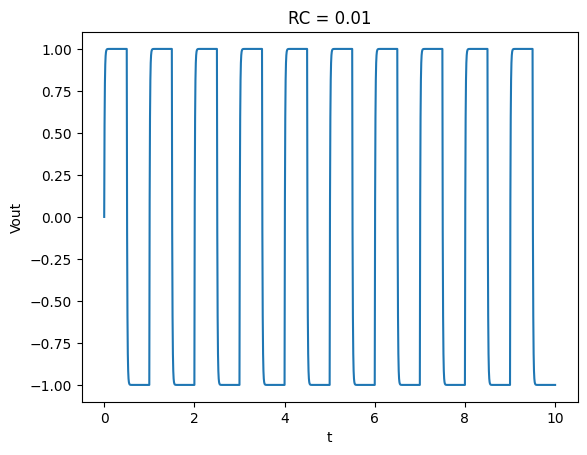

In [251]:
# Graficamos la solucion
plt.plot(T,V1)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.01');

In [252]:
#Obtenemos la solucion con el metodo de euler
V2,T = Euler1D(f,0,0.1,0,10,0.00001)

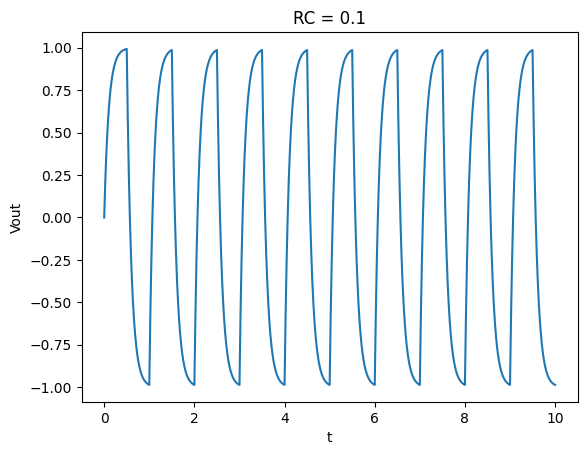

In [253]:
# Graficamos la solucion
plt.plot(T,V2)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.1');

In [254]:
# Obtenemos la solucion con el metodo de euler
V3,T = Euler1D(f,0,1,0,10,0.00001)

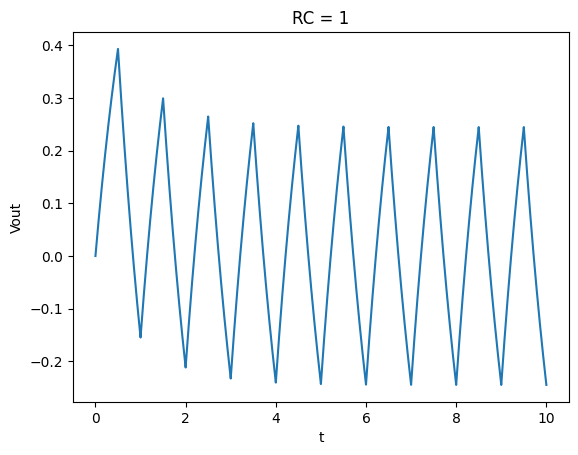

In [255]:
# Graficamos la solucion
plt.plot(T,V3)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 1');

2) Método de Runge-Kutta

In [256]:
# Definimos una funcion con el metodo de Runge-Kutta de 4to orden
def RungeKutta4_1D(f,x0,RC,t0,tf,h):
    
    T=[]
    X=[]

    T.append(t0)
    X.append(x0)

    t=t0
    x=x0

    while (t<tf):
        
        k1 = f(x,RC,t)*h
        k2 = f(x+(k1/2),RC,t+(h/2))*h
        k3 = f(x+(k2/2),RC,t+(h/2))*h
        k4 = f(x+k3,RC,t+h)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6
        t = t + h
        
        X.append(x)
        T.append(t)
  
    return X,T

In [257]:
# Obtenemos la solucion con el metodo de Runge-Kutta
V1,T = RungeKutta4_1D(f,0,0.01,0,10,0.001)

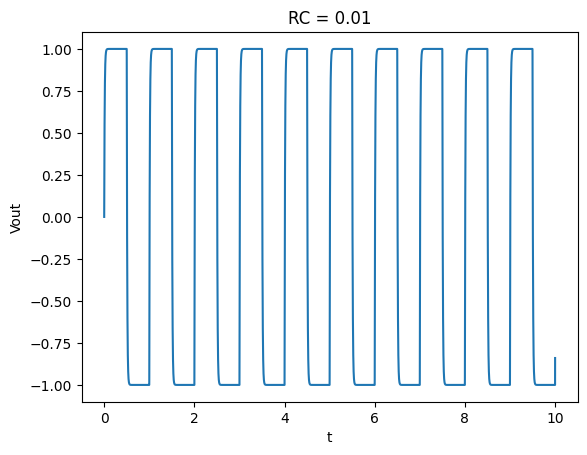

In [258]:
# Graficamos la solucion
plt.plot(T,V1)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.01');

In [259]:
# Obtenemos la solucion con el metodo de Runge-Kutta
V2,T = RungeKutta4_1D(f,0,0.1,0,10,0.001)

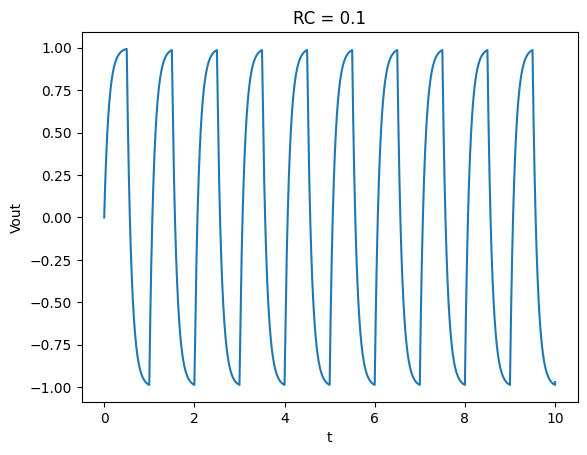

In [260]:
# Graficamos la solucion
plt.plot(T,V2)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 0.1');

In [261]:
# Obtenemos la solucion con el metodo de Runge-Kutta
V3,T = RungeKutta4_1D(f,0,1,0,10,0.001)

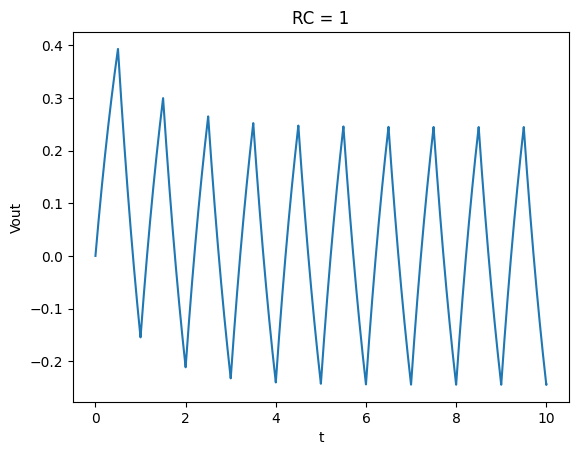

In [262]:
#Graficamos la solucion
plt.plot(T,V3)
plt.ylabel('Vout')
plt.xlabel('t')
plt.title('RC = 1');

**b)** Con base en las gráficas producidas por tu programa, describe lo que ves y explica qué está haciendo el circuito.

Notamos que el voltaje se mantiene oscilando entre un valor positivo y un valor negativo, dependiendo del valor de RC se tiene una caida y subida de voltaje rápida o lenta.

**c)** Describe brevemente cómo se compara resolver el sistema con el método de Euler y el de Runge-Kutta.

La principal diferencia es que para obtener resultados similares, la h utilizada en el método de Euler es mucho más pequeña que la utilizada en el método de Runge-Kutta. Como sabemos a manera que la h es más pequeña el programa tarda más en ejecutarse, por lo que podemos decir que otra de las diferencias es el tiempo de ejecución.

### 2. **El modelo de Lotka-Volterra (predador-presa)**

$$\dfrac{dx}{dt} = \alpha x-\beta xy,$$
$$\dfrac{dy}{dt} = \gamma xy-\delta y.$$

**a)** Escribe un programa para resolver estas ecuaciones usando
1. el método de Euler y
2. el método de Runge-Kutta de cuarto orden
para el caso $\alpha=1$, $\beta = \gamma = 0.5$ y $\delta =2$, comenzando desde la condición inicial $x=y=2$.

In [223]:
# Definimos la funcion
def fun(x):  # x es un vector
    y = np.array(np.zeros(2))
    alpha = 1
    beta = 0.5
    gamma = 0.5
    delta = 2

    y[0] = (alpha * x[0]) - (beta * x[0] * x[1])
    y[1] = (gamma * x[0] * x[1]) - (delta * x[1])
    
    return y

In [224]:
# Metodo de Euler
def Euler2D(f,x0,t0,tf,dt):  ## x0 es un vector de 2D (x0,y0)
    
    T=[]
    X1=[]
    X2=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    T.append(t0)

    t=t0
    x=x0   ## x es un vector de 2D

    while (t<tf):

        x = x + f(x)*dt  ## x es un vector de 2D
        t = t + dt
        
        X1.append(x[0])
        X2.append(x[1])
        T.append(t)

    return X1,X2,T


In [263]:
# Obtenemos la solucion con el metodo de euler
x0 = np.array([2,2]) #condicion inicial
X1,Y1,T = Euler2D(fun,x0,0,30,0.001) 

In [226]:
# Runge-Kutta
def RungeKutta4_2D(f,x0,t0,tf,h): 
    
    T=[]
    X1=[]
    X2=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    T.append(t0)

    t=t0
    x=x0   ## x es un vector de 2D


    while (t<tf):
        
        k1 = f(x)*h
        k2 = f(x+(k1/2))*h
        k3 = f(x+(k2/2))*h
        k4 = f(x+k3)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6
        t = t + h
        
        X1.append(x[0])
        X2.append(x[1])
        T.append(t)
  
    return X1,X2,T

In [265]:
# Obtenemos la solucion con el metodo de Runge-Kutta
x0 = np.array([2,2]) #condicion inicial
X,Y,T = RungeKutta4_2D(fun,x0,0,30,0.01) 

**b)** Haz que el programa realice gráficas que muestren
1. el espacio fase del sistema (i.e $x$ vs $y$), así como el *campo de pendientes* del sistema en el mismo gráfico y también
2. en un gráfico diferente $x$ e $y$ como función del tiempo en los mismos ejes desde $t=0$ hasta $t=30$.

In [266]:
# Campo de pendientes
def campPend(f, xran=[-5, 5], yran=[-5, 5], grid=[35, 35], color='k'):
    """ 
    Grafica el campo de pendientes de una EDO escrita en la forma
        x' = F(x,y)
        y' = G(x,y)

    Las funciones F,G estan definidas en una lista de strings f.
    
    Entrada
    -----
    f:    lista de strings ["F(X,Y)", "G(X,Y)"]
          F,G son funciones de X y Y (mayusculas).
    xran: lista [xmin, xmax] (opcional)
    yran: lista [ymin, ymax] (opcional)
    grid: lista [npoints_x, npoints_y] (opcional)
          Define el numero de puntos en la malla.
    color: string (opcional)
          Color del campo vectorial
    """
    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])
    def dX_dt(X, Y, t=0): return map(eval, f)
    
    X , Y  = np.meshgrid(x, y)  # Crea la malla
    DX, DY = dX_dt(X, Y)        # Direccion del vector
    M = (np.hypot(DX, DY))      # Norma del vector 
    M[ M == 0] = 1.             # Evita dividir entre cero 
    DX = DX/M                   # Normalizacion
    DY = DY/M  
      
    plt.quiver(X, Y, DX, DY, pivot='mid', color=color,width=0.0015)
    plt.xlim(xran), plt.ylim(yran)
    plt.grid('on')


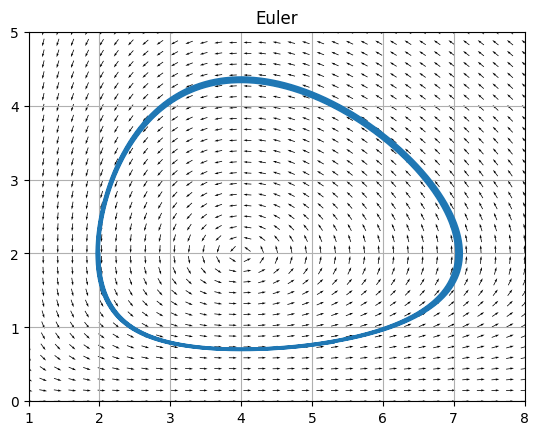

In [267]:
# Graficamos el espacio fase y el campo de pendientes
lotka = ['(alpha * X) - (beta * X * Y)','(gamma * X * Y) - (delta * Y)']
campPend(lotka, xran=[1, 8], yran=[0, 5])
plt.plot(X1,Y1)
plt.title('Euler');

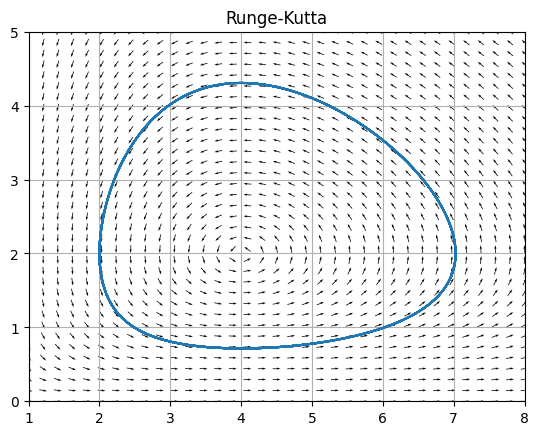

In [268]:
# Graficamos el espacio fase y em campo de pendientes
lotka = ['(alpha * X) - (beta * X * Y)','(gamma * X * Y) - (delta * Y)']
campPend(lotka, xran=[1, 8], yran=[0, 5])
plt.plot(X,Y)
plt.title('Runge-Kutta');

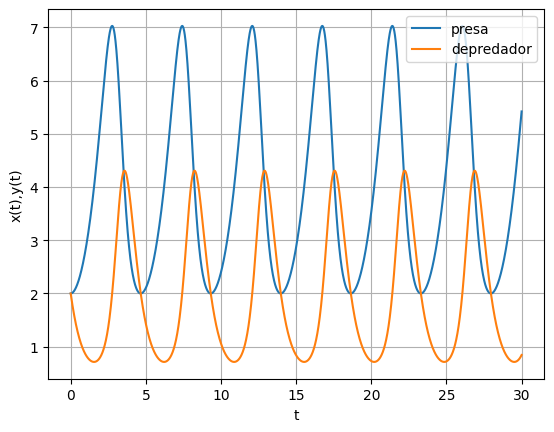

In [269]:
# Graficamos las funciones de poblacion respecto al tiempo
plt.plot(T,X,label='presa')
plt.plot(T,Y,label='depredador')
plt.ylabel('x(t),y(t)')
plt.xlabel('t')
plt.grid()
plt.legend();

**c)** Describe con tus propias palabras lo que está sucediendo en el sistema, en términos de conejos y zorros.

Notamos que cuando la población de conejos aumenta, también lo hace la población de zorros, sin embargo, la población de conejos tiene un máximo y cuando la población empieza a decrecer, hay menos comida y los zorros también mueren, hasta que hay tan pocos que de nuevo la población de conejos empieza a aumentar, el comportamiento de las poblaciones es cíclico.

**d)** Describe brevemente cómo se compara resolver el sistema con el método de Euler y el de Runge-Kutta.

En el espacio fase, notamos que en el método de Euler no se cierra el ciclo, por cada vuelta hay un desplazamiento, lo que provoca que la curva se vea gruesa y no se cierre, mientras que para el método de Runge-Kutta, esto no sucede, la curva se cierra y no se ve gruesa. Podemos decir que Runge-Kutta es mejor para resolver cosas cíclicas.

### 3. **Las ecuaciones de Lorenz**
$$\frac{dx}{dt} = \sigma (y-x), \ \frac{dy}{dt}=rx-y-xz, \ \frac{dz}{dt}= xy-bz.$$

**a)** Escribe un programa para resolver las ecuaciones de Lorenz para el caso $\sigma=10$, $r=28$ y $b=8/3$ en el rango de $t\in(0,50)$ con condición inicial $(x,y,z)=(0,1,0)$.

In [87]:
# Definimos la funcion
def lorenz(x): # x es un vector
    y = np.array(np.zeros(3))
    sigma =10
    r =28
    b =8/3

    y[0] = sigma*(x[1]-x[0])
    y[1] = r*x[0] - x[1] - x[0]*x[2]
    y[2] = x[0]*x[1] - b*x[2]
    
    return y
    

In [88]:
# Runge-Kutta
def RungeKutta4_3D(f,x0,t0,tf,h): 
    
    T=[]
    X1=[]
    X2=[]
    X3=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    X3.append(x0[2])
    T.append(t0)

    t=t0
    x=x0   ## x es un vector de 3D


    while (t<tf):
        
        k1 = f(x)*h
        k2 = f(x+(k1/2))*h
        k3 = f(x+(k2/2))*h
        k4 = f(x+k3)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6
        t = t + h
        
        X1.append(x[0])
        X2.append(x[1])
        X3.append(x[2])
        T.append(t)
  
    return X1,X2,X3,T

In [270]:
# Obtenemos la solucion
x0 = np.array([0,1,0]) # condicion inicial
X,Y,Z,T = RungeKutta4_3D(lorenz,x0,0,50,0.01)

**b)** Haz que tu programa muestre una gráfica de $y$ en función del tiempo. Ten en cuenta la naturaleza impredecible del movimiento.

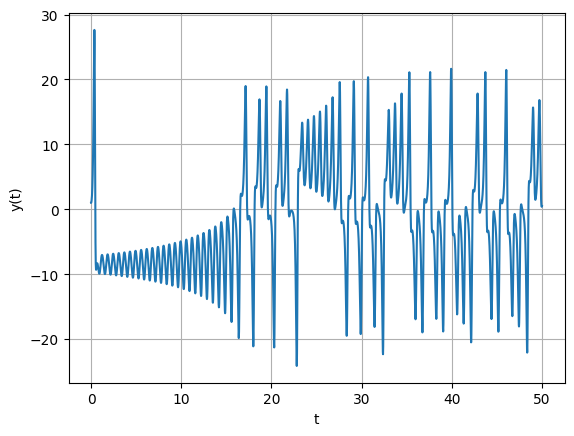

In [271]:
# Graficamos a y como funcion del tiempo
plt.plot(T,Y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid();

**c)** Haz que tu programa también muestre una gráfica de z contra x. Deberías de ver la imagen del famoso "*atractor extraño*" de las ecuaciones de Lorenz, un diagrama desequilibrado en forma de mariposa que nunca se repite.

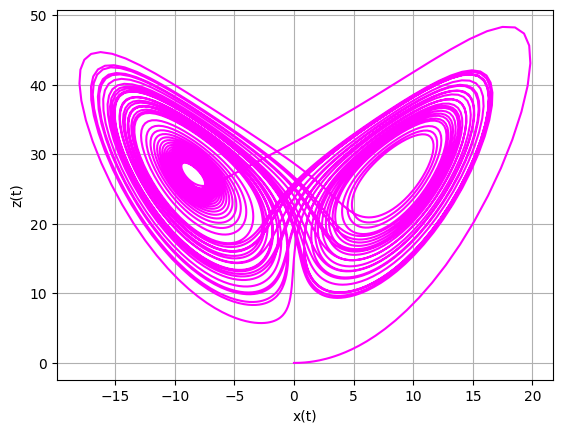

In [272]:
# Graficamos z contra x
plt.plot(X,Z,c='magenta')
plt.xlabel('x(t)')
plt.ylabel('z(t)')
plt.grid();

### 4. **El péndulo simple**
$$\frac{d\theta}{dt}=\omega, \ \frac{d\omega}{dt}=-\frac{g}{l}\sin\theta.$$

**a)** Escribe un programa para resolver el sistema, usando el método de Runge-Kutta de cuarto orden para un péndulo con un brazo de $l=10$cm. 

In [92]:
# Definimos la funcion 
def pendulo(x):
    y = np.array(np.zeros(2))
    g = 9.81
    l = 0.1

    y[0] = x[1]
    y[1] = -(g/l)*np.sin(x[0])
    
    return y

In [273]:
# Definimos una funcion que resuelva la ecuacion diferencial a partir de la condicion inicial
def solu(theta): # angulo en grados
    theta = theta*(np.pi/180)
    g = 9.81
    l = 0.1
    x0 = np.array([theta,0])  # consideramos w=0 debido a que en cierto angulo el pendulo parte del reposo
    Theta, W, T = RungeKutta4_2D(pendulo,x0,0,30,0.01)
    return Theta, W, T

**b)** Usa tu programa para mostrar en una sola figura
1. la gráfica del espacio fase del sistema ($\theta$ vs $\omega$) para varias condiciones iniciales del ángulo ($\theta_0$) y
2. el *campo de pendientes*.

In [274]:
# Definimos una funcion que grafique el espacio fase dependienco de la condicion inicial
def condIn(theta0): # theta0 es un vector
    for i in range(len(theta0)):
        T1,W1,t1 = solu(theta0[i])
        plt.plot(T1,W1)
    plt.grid()
    plt.xlabel('theta(t)')
    plt.ylabel('w(t)');

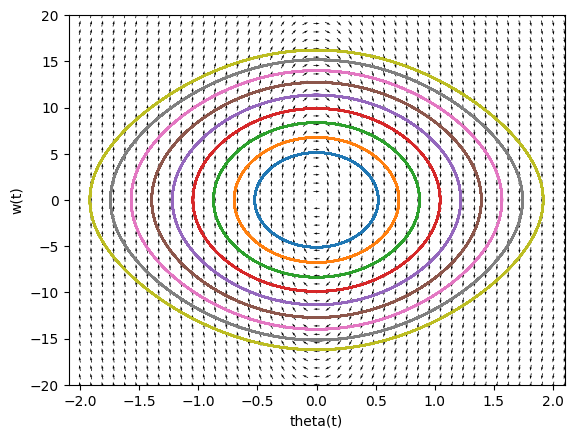

In [275]:
# Graficamos el espacio fase y el campo de pendientes
pendulum = ["Y", "-(9.81/0.1)*np.sin(X)"]  
campPend(pendulum, xran=[-2.1, 2.1], yran=[-20, 20],grid=[45, 45])
theta0 = np.array([30,40,50,60,70,80,90,100,110])
condIn(theta0)

**c)** Usa el programa para graficar $\theta$ en función del tiempo, para varias condiciones iniciales (en el mismo gráfico).

In [276]:
# Definimos una funcion que grafique a theta como funcion del tiempo dependiendo de la condicion inicial
def condIn2(theta0): # theta0 es un vector
    for i in range(len(theta0)):
        T1,W1,t1 = solu(theta0[i])
        plt.plot(t1,T1,label='%.0f°'%(int(theta0[i])))
    plt.grid()
    plt.ylabel('theta(t)')
    plt.xlabel('t');

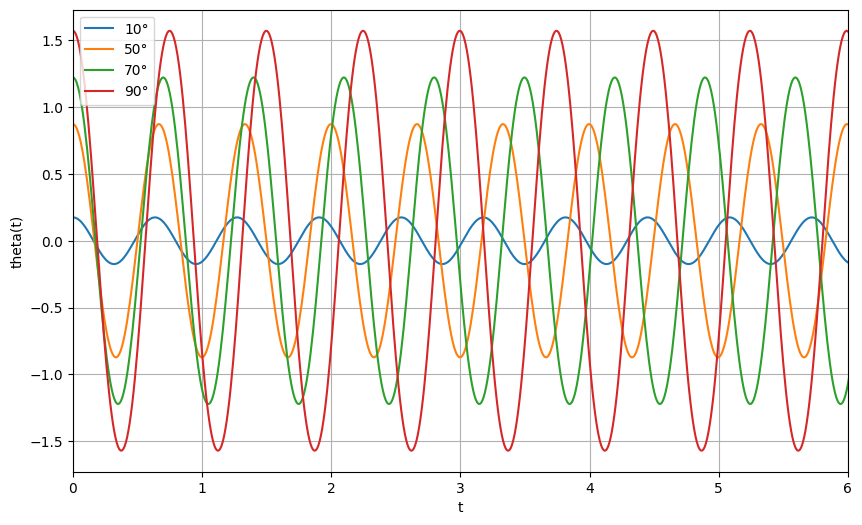

In [277]:
# Graficamos theta como funcion del tiempo para varias condiciones iniciales
plt.figure(figsize=(10,6))
theta0 = np.array([10,50,70,90])
condIn2(theta0)
plt.xlim(0,6)
plt.legend();

**d)** Describe con tus propias palabras lo que esta sucediendo en el sistema.

Vemos que sea cual sea el ángulo inicial del péndulo, este será su ángulo máximo y mínimo, en donde estará oscilando el péndulo, es decir que el movimiento del péndulo estará limitado por su condición inicial.

### 5. **El péndulo doble**
$$\dot{\theta_1}=\omega_1, \ \dot{\theta_2}=\omega_2,$$
$$\dot{\omega_1}= -\frac{\omega_1^2\sin(2\theta_1-2\theta_2)+2\omega_2^2\sin(\theta_1-\theta_2)+(g/l)[\sin(\theta_1-2\theta_2)+3\sin\theta_1]}{3-\cos(2\theta_1-2\theta_2)},$$
$$\dot{\omega_2}= \frac{4\omega_1^2\sin(\theta_1-\theta_2)+\omega_2^2\sin(2\theta_1-2\theta_2)+2(g/l)[\sin(2\theta_1-\theta_2)-\sin\theta_2]}{3-\cos(2\theta_1-2\theta_2)}.$$

**a)** Deriva una expresión para la energía total $E=V+T$ del sistema en términos de las variables $\theta_1,\ \theta_2,\ \omega_1,\ \omega_2,$ más las constantes $g,\ l,\ m.$

Usando que:

$h_1 = -l\cos\theta_1$,  

$h_2=-l(\cos\theta_1+\cos\theta_2)$,  

$v_1=l\omega_1$,  

$v_2^2=l^2[\omega_1^2+\omega_2^2+2\omega_1\omega_2\cos(\theta_1-\theta_2)]$, 

se tiene que

$E =V+T=mgh_1+mgh_2+\frac{1}{2}mv_1^2+\frac{1}{2}mv_2^2 = -mgl(2\cos\theta_1+\cos\theta_2)+ml^2[\omega_1^2+\frac{1}{2}\omega_2^2+\omega_1\omega_2\cos(\theta_1-\theta_2)]$

**b)** Escribe un programa usando el método de Runge-Kutta de cuarto orden, para resolver las ecuaciones de movimiento para el caso donde $l=40$cm, con las condiciones iniciales $\theta_1=\theta_2=90$° y $\omega_1=\omega_2=0$. Usa tu programa para calcular la energía total del sistema suponiendo que la masa de las pesas es de 1 kg cada una, y haz una gráfica de la energía en función del tiempo desde $t=0$ hasta $t=100$ segundos.

In [214]:
# Pendulo doble
def pendulo_dob(x):
    #x[0]=theta1, x[1]=theta2, x[2]=w1, x[3]=w2
    y = np.array(np.zeros(4))
    g = 9.81
    l = 0.4

    y[0] = x[2] 
    y[1] = x[3]
    a = (np.sin(2*x[0]-2*x[1])* x[2]**2)+(2*np.sin(x[0]-x[1])* x[3]**2)+((g/l)*(np.sin(x[0]-2*x[1])+3*np.sin(x[0])))
    b = (4*np.sin(x[0]-x[1])* x[2]**2)+(np.sin(2*x[0]-2*x[1])* x[3]**2)+(2*(g/l)*(np.sin(2*x[0]-x[1])-np.sin(x[1])))
    c = 3 - np.cos(2*x[0]-2*x[1])
    y[2] = -a/c
    y[3] =b/c

    return y

In [215]:
# Runge-Kutta
def RungeKutta4_4D(f,x0,t0,tf,h): 
    
    T=[]
    X1=[]
    X2=[]
    X3=[]
    X4=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    X3.append(x0[2])
    X4.append(x0[3])
    T.append(t0)

    t=t0
    x=x0   ## x es un vector de 4D


    while (t<tf):
        
        k1 = f(x)*h
        k2 = f(x+(k1/2))*h
        k3 = f(x+(k2/2))*h
        k4 = f(x+k3)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6
        t = t + h
        
        X1.append(x[0])
        X2.append(x[1])
        X3.append(x[2])
        X4.append(x[3])
        T.append(t)
  
    return X1,X2,X3,X4,T

In [278]:
# Obtenemos la solucion
x0 = np.array([0.5*np.pi,0.5*np.pi,0,0]) # condicion inicial
t1,t2,w1,w2,T = RungeKutta4_4D(pendulo_dob,x0,0,100,0.001)

In [279]:
# Definimos una lista para la energia
en=[]

# Llenamos la lista de la energia a partir de la solucion de las ecuaciones de movimiento del pendulo doble
for i in range(len(T)):
    l = 0.4
    m = 1
    g = 9.81
    a = -(m*g*l*(2*np.cos(t1[i])+np.cos(t2[i]))) + (m*(l**2)*(w1[i]**2+(0.5*w2[i]**2)+w1[i]*w2[i]*np.cos(t1[i]-t2[i])))
    en.append(a)

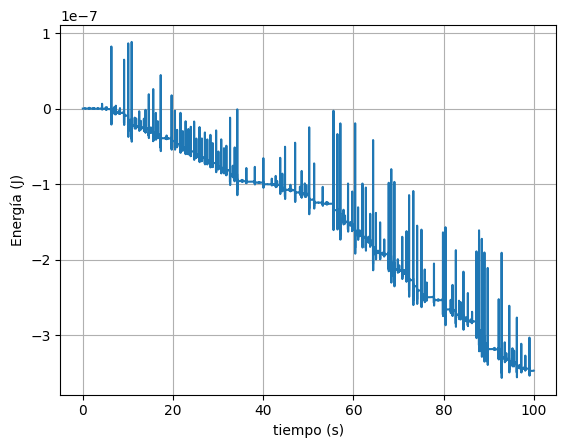

In [280]:
# Graficamos a la energia como funcion del tiempo
plt.plot(T,en)
plt.ylabel('Energía (J)')
plt.xlabel('tiempo (s)')
plt.grid();